In [1]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras


import time
import argparse

from tqdm import tqdm

from keras.models import load_model, Model


In [2]:
cd C:/Users/fjdur/Documents/utils/

C:\Users\fjdur\Documents\utils


In [3]:
import utils_guided_retraining as utils

2.5.0
keras
2.5.0


In [4]:
dataset = "gtsrb"

In [5]:
x_test,y_test = utils.get_data(dataset,"Test")

In [6]:
x_train_and_adversary,y_train_and_adversary = utils.get_data(dataset,"Train_and_adversary")

In [7]:
x_test_and_adversary,y_test_and_adversary = utils.get_adversarial_data(dataset,'Test_adversarial') 

In [8]:

model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06/"
if(dataset == 'gtsrb'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06"
elif(dataset == 'intel'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/intel_model_21_10"
elif(dataset == 'mnist'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/models2"
elif(dataset == 'cifar'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/model_02"


In [9]:
print(model_dir)
model_original = utils.My_model(dataset,True, model_dir)

C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06
Model loaded correctly


## Loading models

In [10]:
data_dir = "D:/models/aug_22"
dataset = "gtsrb"
config = "C3"
config_lc = "c3"
num_models = 20

In [11]:
loading = True

models_lsa = []

if loading:
    for i in range(num_models):
        model_lsa_dir = data_dir+"/"+dataset+"/C3/e2/"+dataset+"_model_c3_aug_lsa_e2_"+str(i)
        print(model_lsa_dir)
        model =utils.My_model(dataset,True,model_lsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_lsa.append(model)
       
    

D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_0
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_1
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_2
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_3
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_4
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_5
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_6
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_7
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_8
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_9
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_10
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_lsa_e2_11
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_mod

In [12]:
len(models_lsa)

20

In [13]:
loading = True

models_dsa = []

if loading:
    for i in range(num_models):
        #model_dsa_dir = "D:/models/gtsrb_models/C1/gtsrb_model_c1_sep_dsa_e2_"+str(i)
        model_dsa_dir = data_dir+"/"+dataset+"/C3/e2/"+dataset+"_model_c3_aug_dsa_e2_"+str(i)
        print(model_dsa_dir)
        model =utils.My_model(dataset,True,model_dsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dsa.append(model)
       

    

D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_0
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_1
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_2
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_3
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_4
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_5
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_6
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_7
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_8
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_9
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_10
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dsa_e2_11
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_mod

In [14]:
loading = True

models_dg = []

if loading:
    for i in range(num_models):
        #model_dg_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_gn_e1_"+str(i)
        model_dg_dir = data_dir+"/"+dataset+"/C3/e2/"+dataset+"_model_c3_aug_dg_e2_"+str(i)
        
        print(model_dg_dir)
        model =utils.My_model(dataset,True,model_dg_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dg.append(model)
       
    

D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_0
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_1
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_2
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_3
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_4
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_5
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_6
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_7
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_8
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_9
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_10
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg_e2_11
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_dg

In [15]:
loading = True

models_se = []

if loading:
    for i in range(num_models):
        
        model_se_dir = data_dir+"/"+dataset+"/C3/e2/"+dataset+"_model_c3_aug_se_e2_"+str(i)
        
        print(model_se_dir)
        model =utils.My_model(dataset,True,model_se_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_se.append(model)

D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_0
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_1
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_2
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_3
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_4
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_5
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_6
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_7
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_8
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_9
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_10
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se_e2_11
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_se

In [18]:
loading = True

models_random = []

if loading:
    for i in range(num_models):
        #model_random_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_"+str(i)
        model_random_dir = data_dir+"/"+dataset+"/C3/e2/"+dataset+"_model_c3_aug_random_e2_"+str(i)
        
        print(model_random_dir)
        model =utils.My_model(dataset,True,model_random_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_random.append(model)
       

D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_0
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_1
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_2
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_3
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_4
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_5
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_6
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_7
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_8
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_9
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_10
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_random_e2_11
Model loaded correctly
D:

In [17]:
loading = True

models_nc = []

if loading:
    for i in range(num_models):
        #model_nc_dir = "D:/models/aug_22/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1"+str
        model_nc_dir = data_dir+"/"+dataset+"/C3/e2/"+dataset+"_model_c3_aug_nc_e2_"+str(i)
        print(model_nc_dir)
        model =utils.My_model(dataset,True,model_nc_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_nc.append(model)

D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_0
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_1
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_2
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_3
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_4
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_5
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_6
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_7
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_8
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_9
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_10
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc_e2_11
Model loaded correctly
D:/models/aug_22/gtsrb/C3/e2/gtsrb_model_c3_aug_nc

## Evaluating

In [20]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [21]:
evaluate_lsa = []
evaluate_dsa = []
evaluate_dg = []
evaluate_se = []
evaluate_nc = []
evaluate_random = []

evaluate_lsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_dsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_dg.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_se.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_nc.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_random.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))

246/246 [==============================] - 22s 89ms/step - loss: 0.8656 - accuracy: 0.8480 - precision_141: 0.9325 - recall_141: 0.8477 6s - loss: 0.1369 - ETA: 1s - loss: 0.6608 - accuracy: 0.8810 - precision_141: 0.9327 - recal


In [22]:
# Metrics using adversarial test

#evaluate_lsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_dsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_nc.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_random.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for lsa")
for model in models_lsa:
    evaluate_lsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for dsa")
for model in models_dsa:
    evaluate_dsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for random")
for model in models_random:
    evaluate_random.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for nc")
for model in models_nc:
    evaluate_nc.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))

Evaluating for lsa
246/246 [==============================] - 23s 78ms/step - loss: 0.0700 - accuracy: 0.9846 - precision_19: 0.9911 - recall_19: 0.9857
Evaluating for dsa
246/246 [==============================] - 23s 79ms/step - loss: 0.0589 - accuracy: 0.9867 - precision_39: 0.9887 - recall_39: 0.9857
Evaluating for random
246/246 [==============================] - 23s 81ms/step - loss: 0.0628 - accuracy: 0.9848 - precision_139: 0.9879 - recall_139: 0.9841
Evaluating for nc
246/246 [==============================] - 24s 83ms/step - loss: 0.0736 - accuracy: 0.9843 - precision_119: 0.9884 - recall_119: 0.9769


In [23]:
print("Evaluating for dg")
for model in models_dg:
    evaluate_dg.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for se")
for model in models_se:
    evaluate_se.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))


Evaluating for dg
246/246 [==============================] - 27s 94ms/step - loss: 0.0852 - accuracy: 0.9863 - precision_59: 0.9860 - recall_59: 0.9847
Evaluating for se
246/246 [==============================] - 32s 116ms/step - loss: 0.0964 - accuracy: 0.9823 - precision_79: 0.9824 - recall_79: 0.9808


In [24]:
len(evaluate_dg)

21

In [25]:
len(evaluate_nc)

21

In [26]:
import pandas as pd

df_evaluate_lsa = pd.DataFrame(np.array(evaluate_lsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa = pd.DataFrame(np.array(evaluate_dsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dg = pd.DataFrame(np.array(evaluate_dg),columns=["loss","accuracy","precision","recall"])
df_evaluate_se = pd.DataFrame(np.array(evaluate_se),columns=["loss","accuracy","precision","recall"])

df_evaluate_random = pd.DataFrame(np.array(evaluate_random),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc = pd.DataFrame(np.array(evaluate_nc),columns=["loss","accuracy","precision","recall"])


In [28]:
save_dir = "D:/aug_graphs/"+dataset+"/"+config_lc+"_2"
print(save_dir)

D:/aug_graphs/gtsrb/c3_2


In [29]:
df_evaluate_lsa.to_csv(save_dir+"/lsa_"+config_lc,index=False)
df_evaluate_dsa.to_csv(save_dir+"/dsa_"+config_lc,index=False)
df_evaluate_dg.to_csv(save_dir+"/dg_"+config_lc,index=False)
df_evaluate_se.to_csv(save_dir+"/se_"+config_lc,index=False)
df_evaluate_random.to_csv(save_dir+"/random_"+config_lc,index=False)
df_evaluate_nc.to_csv(save_dir+"/nc_"+config_lc,index=False)

In [12]:
import pandas as pd
loading_csv = True
if(loading_csv):
    
    df_evaluate_lsa = pd.read_csv(save_dir+"/lsa_"+config_lc)
    df_evaluate_dsa = pd.read_csv(save_dir+"/dsa_"+config_lc)
    df_evaluate_dg = pd.read_csv(save_dir+"/dg_"+config_lc)
    df_evaluate_se = pd.read_csv(save_dir+"/se_"+config_lc)
    df_evaluate_random = pd.read_csv(save_dir+"/random_"+config_lc)
    df_evaluate_nc = pd.read_csv(save_dir+"/nc_"+config_lc)

In [30]:
df_evaluate_dg

,loss,accuracy,precision,recall
0,0.865599,0.848037,0.937963,0.860125
1,0.586184,0.869582,0.947378,0.910426
2,0.620076,0.852754,0.937297,0.861980
3,0.848578,0.796660,0.944398,0.735833
4,0.592517,0.850586,0.944779,0.820332
5,0.761926,0.822922,0.911247,0.788788
6,0.273260,0.931795,0.962187,0.942521
7,0.206182,0.944926,0.976956,0.963429
8,0.200454,0.946201,0.981947,0.971349
9,0.180957,0.958185,0.989816,0.985818


In [31]:

metric ="accuracy"
accuracy_lsa_3 = np.array(df_evaluate_lsa[metric])
accuracy_dsa_3 = np.array(df_evaluate_dsa[metric])
accuracy_dg_3 = np.array(df_evaluate_dg[metric])
accuracy_se_3 = np.array(df_evaluate_se[metric])

accuracy_nc_3 =np.array(df_evaluate_nc[metric])
accuracy_random_3 = np.array(df_evaluate_random[metric])


In [32]:
n_data_points = 190

In [33]:
len(accuracy_dsa_3)

21

In [34]:
n_inputs = [n_data_points*i for i in range(num_models)]
n_inputs.append(3921) #3921
print(len(n_inputs))
n_inputs

21


[0,
 190,
 380,
 570,
 760,
 950,
 1140,
 1330,
 1520,
 1710,
 1900,
 2090,
 2280,
 2470,
 2660,
 2850,
 3040,
 3230,
 3420,
 3610,
 3921]

In [35]:
print(len(df_evaluate_dg))
print(len(n_inputs))

21
21


In [36]:
#save_dir = "D:/aug_graphs/"+dataset+"/"+config

In [37]:
linestyles = ['solid','dotted','dashed','dashed','dashdot','dashdot']
colors =['b','g','r','c','m','k']

3610 0.9584395885467529
3921 0.9614992141723633
2850 0.9608618021011353
2850 0.9600968956947327
3230 0.9566547870635986
3921 0.9524477124214172


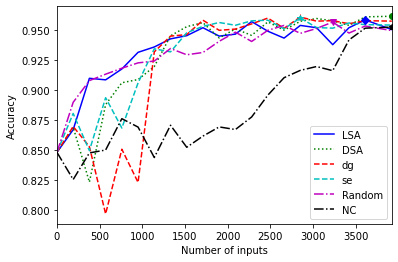

In [38]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, 3921])
#plt.ylim([0.5, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()